In [88]:
import pandas as pd
import numpy as np
from pandas import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
#read data
df = pd.read_excel('ice_cream.xlsx',sep = ',')
df.head(5)

,DATE,count
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [90]:
df.rename(columns={'DATE':'date','count':'production'},inplace=True)
df.head(5)

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [91]:
df['date'] = pd.to_datetime(df.date)
df.head(5)

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [92]:
df.set_index('date',inplace=True)
df.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [93]:
start_date= pd.to_datetime('2010-01-01')
df = df[start_date:]
df.head(5)

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [94]:
df.tail(5)

,production
date,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


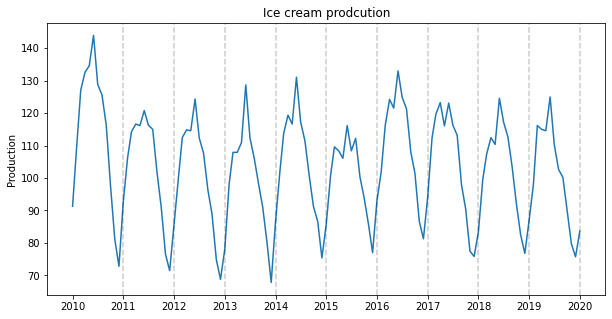

In [95]:
plt.figure(figsize=(10,5))
plt.plot(df.production)
plt.title('Ice cream prodcution')
plt.ylabel('Production')
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--', alpha=0.2)

### We can see in summer production is high as a seasonal component

# Let's see ACF

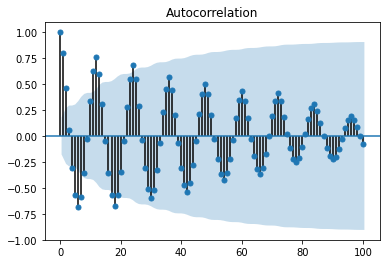

In [96]:
# plt.figure(figsize=(10,4))
acf_plot = plot_acf(df.production,lags = 100)

### as per the visual test we can see a auto regressive patteren as the continous decay is significant
     But still let's continue our analysis by doing PACF and who knows what we can find
     
# PACF

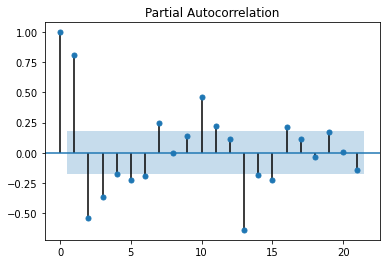

In [97]:
pacf_plot = plot_pacf(df.production)

### Well we can observe that we are dealing with auto regressive problem lags at 1,2,3,10,13 and ignoring below or almost close lags

    Let's start to preparea AR(3) Model and see if it fits

In [153]:
train_end = pd.to_datetime('2018-12-1')
test_end = pd.to_datetime('2019-12-1')

# train_end = datetime(2018,12,1)
# test_end = datetime(2019,12,1)

In [154]:
train_end

Timestamp('2018-12-01 00:00:00')

In [155]:
train_data = df[:train_end]
test_data= df[train_end + timedelta(days = 1):test_end]

In [156]:
test_data

,production
date,
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718
2019-04-01,114.9703
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,100.1741


In [157]:
#model Creation
model = ARMA(train_data,order=(3,0))

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [158]:
start = time()
model_fit  = model.fit()
end = time()
print('model_fit time',end-start)

model_fit time 0.08260583877563477


In [159]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(3, 0)   Log Likelihood                -374.085
Method:                       css-mle   S.D. of innovations              7.642
Date:                Tue, 26 May 2020   AIC                            758.170
Time:                        05:28:38   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5743      1.809     57.265      0.000     100.029     107.119
ar.L1.production     1.0469      0.088     11.960      0.000       0.875       1.218
ar.L2.production    -0.0523 

## Here points to focus p values, for Lag1 and lag3 values are less than 0.05 so we will conside that for our model excluding lag2 as it way above 0.05

In [161]:
#let's to some test
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#calculating residuals
predictions = model_fit.predict(start=pred_start_date,end = pred_end_date)
residuals = test_data - predictions
residuals.head(5)
#need to check later

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,production
date,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


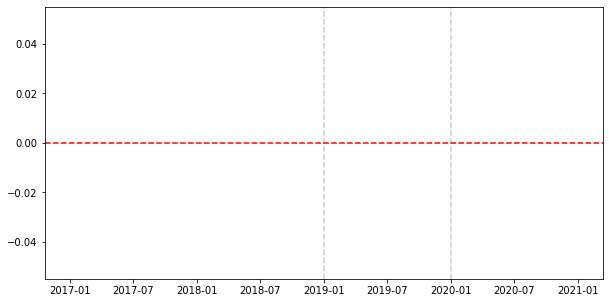

In [141]:
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.axhline(0,color='r',linestyle ='--')
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--', alpha=0.2)

In [171]:
x = predictions
x = pd.DataFrame(x)
x

,0
2019-01-01,81.236302
2019-02-01,90.140621
2019-03-01,101.523346
2019-04-01,111.164245
2019-05-01,117.060751
2019-06-01,118.125933
2019-07-01,115.033460
2019-08-01,109.355385
2019-09-01,103.141877
2019-10-01,98.184600


In [172]:
test_data

,production
date,
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718
2019-04-01,114.9703
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,100.1741


### Here you can see some difference that our prediction varried from actual with3 lags

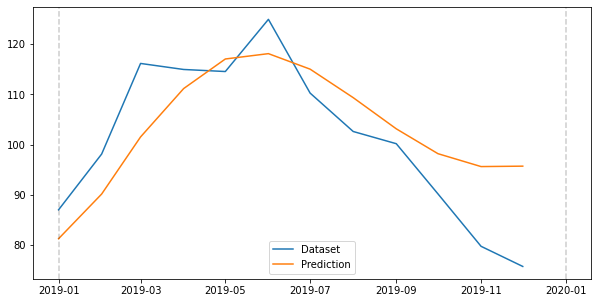

In [142]:
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Dataset','Prediction'))
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--', alpha=0.2)

In [143]:
np.sqrt(np.mean(residuals**2))

2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-08-01 00:00:00   NaN
2019-09-01 00:00:00   NaN
2019-10-01 00:00:00   NaN
2019-11-01 00:00:00   NaN
2019-12-01 00:00:00   NaN
production            NaN
dtype: float64

## Let's see some stock data

In [52]:
import yfinance as yf
#ticker symbol for specific stock name
tickerSymbol = 'SPY'
ticker_data = yf.Ticker(tickerSymbol)
ticker_df = ticker_data.history(period='1d',start='2015-01-02',end='2020-04-01')
ticker_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,185.93,186.38,183.94,185.07,121465900,0.0,0
2015-01-05,183.94,184.12,181.40,181.73,169632600,0.0,0
2015-01-06,182.06,182.63,179.15,180.02,209151400,0.0,0
2015-01-07,181.46,182.63,180.97,182.26,125346700,0.0,0
2015-01-08,183.79,185.73,183.77,185.49,147217800,0.0,0
...,...,...,...,...,...,...,...
2020-03-25,244.87,256.35,239.75,246.79,299430300,0.0,0
2020-03-26,249.52,262.80,249.05,261.20,257632800,0.0,0
2020-03-27,253.27,260.81,251.05,253.42,224341200,0.0,0


In [43]:
df = ticker_df[['Close']]
df

,Close
Date,
2015-01-02,185.07
2015-01-05,181.73
2015-01-06,180.02
2015-01-07,182.26
2015-01-08,185.49
...,...
2020-03-25,246.79
2020-03-26,261.20
2020-03-27,253.42


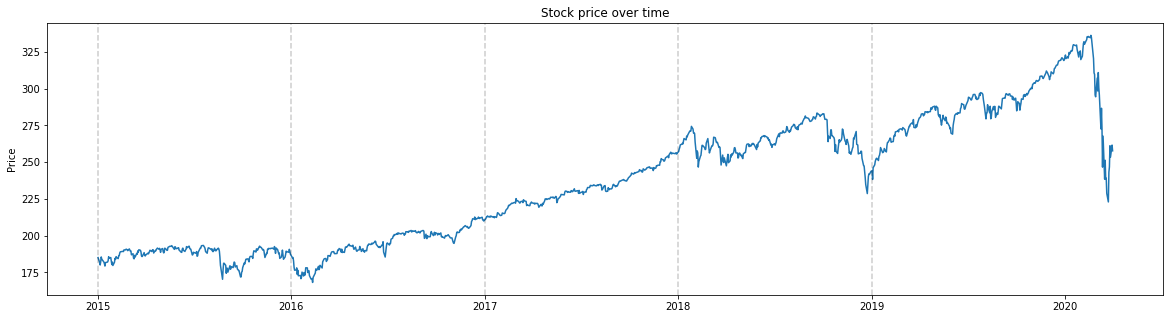

In [46]:
plt.figure(figsize=(20,5))
plt.plot(df.Close)
plt.title('Stock price over time')
plt.ylabel('Price')
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--', alpha=0.2)

In [47]:
#Checking for stationary test
first_dif = df.Close.values[1:]-df.Close.values[:-1]
first_dif = np.concatenate([first_dif,[0]])

In [48]:
df['first_diff'] = first_dif
df.head(5)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,first_diff
Date,,
2015-01-02,185.07,-3.34
2015-01-05,181.73,-1.71
2015-01-06,180.02,2.24
2015-01-07,182.26,3.23
2015-01-08,185.49,-1.48


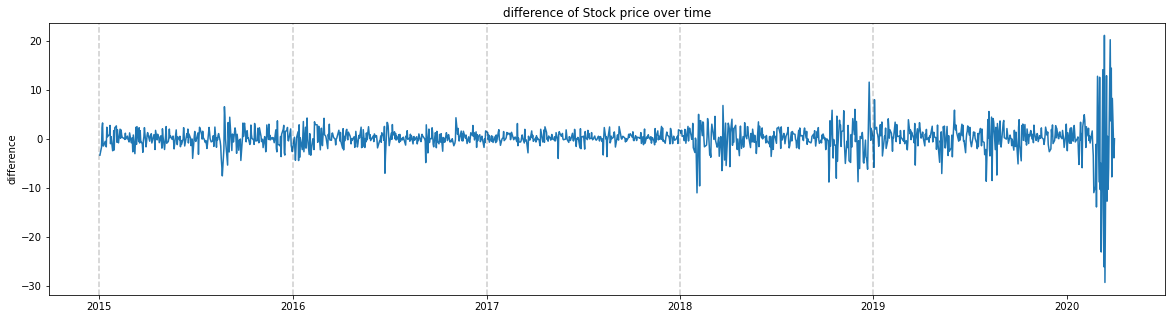

In [49]:
plt.figure(figsize=(20,5))
plt.plot(df.first_diff)
plt.title('difference of Stock price over time')
plt.ylabel('difference')
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--', alpha=0.2)

 ## ACF

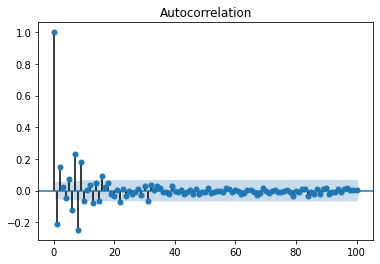

In [50]:
acf_plot = plot_acf(df.first_diff,lags = 100)

## PACF

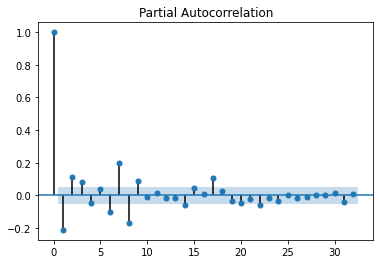

In [51]:
pacf_plot = plot_pacf(df.first_diff)

#### That's why it's so hard to predict stock price as ACF and PACF is not provides any strong evidence to apply ML